In [9]:
#Import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import scipy.stats as stats
from scipy.stats import linregress

In [ ]:
#Dave's Code

In [ ]:
#Doug's Code

In [ ]:
#Scott's Code

In [ ]:
#Megan's Code

In [12]:
#Justin's Code
justin_df = pd.read_csv("census_and_epa.csv")
justin_df
justin_df.drop(columns=['Total Male', 'Total Female', 'PctBelowPoverty Male', 'PctBelowPoverty Female', 'Unnamed: 0', 'Unnamed: 0.1'])
poverty_by_year_df = justin_df[['Year', 'PctBelowPoverty Population']]
year_grouped_series = poverty_by_year_df.groupby(['Year'])
year_list = poverty_by_year_df['Year'].unique()

percent_poverty = year_grouped_series["PctBelowPoverty Population"].mean()

final_poverty_grouped_df = pd.DataFrame({"year": year_list, "Percent Below Poverty": percent_poverty})

x_axis = year_list
poverty_points = final_poverty_grouped_df['Percent Below Poverty']


,Unnamed: 0,Unnamed: 0.1,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,PctBelowPoverty Population,PctBelowPoverty Under 18,PctBelowPoverty 18 to 64,PctBelowPoverty 65 and over,PctBelowPoverty Male,PctBelowPoverty Female,PctBelowPoverty 16 and Over,PctBelowPoverty 16 and Over Employed,State Code,County Code
0,0,0,Alabama,Baldwin,2012,284,226,56,2,0,...,14.1,20.2,14.2,30.5,NaN,NaN,20.1,22.8,1,3
1,1,3,Alabama,DeKalb,2012,361,282,74,5,0,...,13.3,20.4,12.9,NaN,NaN,NaN,36.6,31.7,1,49
2,2,4,Alabama,Elmore,2012,245,212,33,0,0,...,13.0,19.9,10.1,19.0,NaN,NaN,14.5,11.8,1,51
3,3,5,Alabama,Etowah,2012,277,229,48,0,0,...,21.2,32.4,19.8,27.8,NaN,NaN,40.5,41.0,1,55
4,4,6,Alabama,Houston,2012,284,238,46,0,0,...,19.2,28.8,17.1,38.8,NaN,NaN,38.4,31.9,1,69


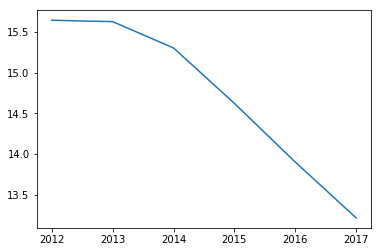

In [47]:
plt.plot(x_axis, poverty_points)
plt.show()

In [5]:
AQI_by_year_df = justin_df[['Year', 'Median AQI']]
year_grouped_series_AQI = AQI_by_year_df.groupby(['Year'])

median_AQI_series = year_grouped_series_AQI["Median AQI"].mean()

final_AQI_grouped_df = pd.DataFrame({"year": year_list, "Median AQI": median_AQI_series})

AQI_points = final_AQI_grouped_df['Median AQI']

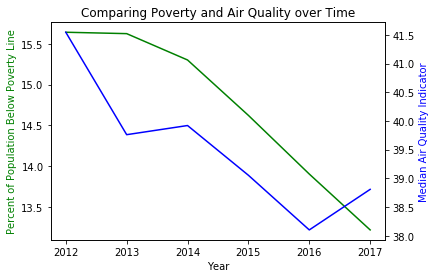

In [26]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_axis, poverty_points, 'g-')
ax2.plot(x_axis, AQI_points, 'b-')



ax1.set_xlabel('Year')
ax1.set_ylabel('Percent of Population Below Poverty Line', color='g')
ax2.set_ylabel('Median Air Quality Indicator', color='b')
plt.title('Comparing Poverty and Air Quality over Time')
plt.savefig('poverty vs air quality plot', dpi=200)
plt.show()